#  <span style="color:rgb(50,100,100);"><strong>&#128304; Desafío entregable #8: Data Storytelling &#128304;</strong></span>

In [1]:
#Cargamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
# Configurar pandas para que muestre toda la tabla sin truncar los datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**INDICE**

1. Introduccion


2. Inspeccion de datos


3. Limpieza de datos

  3.1 Datos Nulos


4. Generacion de transformaciones


5. Visualizando distribuciones

  5.1 Envios por region

  5.2 Tipo de operaciones y movimientos

  5.3 Operaciones por provincias

  5.4 Precio - Costo - Margen de ganancia

  5.5 Tipo de clientes

  
6. Concluciones y cierre

## ⏩ **1. Introduccion**

La empresa nace en el año 1994 con el objetivo de desarrollar nuevas estrategias en el ámbito de las entregas puerta a puerta a nivel Nacional.

A través de los años la empresa se va consolidando en el rubro, logrando un nombre de prestigio en el mercado.

A lo largo de sus primeros 22 años de vida, ECOLOGISTICA no solo logra crecer en volumen y especialización, sino que también incorpora nuevos servicios, todos ellos de alto valor agregado.

Para ello, se decide analizar los datos de los últimos tres años para identificar patrones y tendencias en el movimiento de los productos asi como un análisis detallado de la operación diaria de la empresa, recopilar y analizar los datos de facturación y costos, y analizar cómo varía la duración de los envíos según la zona de destino. De esta manera, la empresa podrá tomar decisiones informadas sobre su operación diaria, identificar las áreas de mejora en su rentabilidad y satisfacer mejor las necesidades de sus clientes.


## ⏩ **2. Inspeccion de datos**

In [3]:
#cargamos el dataset con el que vamos a trabajar
url_postal2022int='https://drive.google.com/file/d/1xO1EDGJlxtfJWOMUGu27fOHMar3rTilo/view'
path_postal2022int= 'https://drive.google.com/uc?export=download&id='+ url_postal2022int.split('/')[-2]
postal=pd.read_csv(path_postal2022int, delimiter=";", encoding="latin-1", low_memory=False)

In [4]:
print(f'\t El dataset tiene {postal.shape[0]} filas y {postal.shape[1]} columnas. \n')

	 El dataset tiene 128119 filas y 33 columnas. 



In [5]:
postal.head()

,id,cliente_id,empresa,tipo_operacion,grupo,estado,peso,bultos,fecha_hora,fechaplanilla,fecha_hora_entrega,fecha_ultimo_estado,Indice_inflacion_%,tipo_cambio_USD_oficial,precio_USD_oficial,precio,costo_adicional1,costo_distribuidor,costo_transporte,costo_interno,guias_bio,destino_zona,origen_zona,tipo_guia,movimiento,destino_cp,destino_localidad,destino_provincia,destino_region,origen_cp,origen_localidad,origen_provincia,origen_region
0,2202100,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,14/1/2022 14:54,13/1/2022 00:00,14/1/2022 00:00,14/1/2022 00:00,"3,88%","108,75",0,0,0,"277,2",0,"143,5",0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA
1,2220301,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,21/1/2022 16:13,20/1/2022 00:00,21/1/2022 00:00,21/1/2022 00:00,"3,88%","109,25",0,0,0,"277,2",0,0,0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA
2,2237773,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,28/1/2022 14:20,27/1/2022 00:00,28/1/2022 00:00,28/1/2022 00:00,"3,88%","110,25",0,0,0,"277,2",0,0,0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA
3,2237781,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,28/1/2022 14:20,27/1/2022 00:00,28/1/2022 00:00,28/1/2022 00:00,"3,88%","110,25",0,0,0,"277,2",0,0,0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA
4,2271223,99,Alchemix Corp,ENTREGA PAQUETERIA,ENTREGADA,POD-ENTREGADA,NaN,1,11/2/2022 10:47,14/2/2022 00:00,15/2/2022 00:00,15/2/2022 00:00,"4,69%","111,25",0,0,0,"277,2",0,157,0,INTERIOR,AMBA,GUIAS STANDARD,AMBA - INTERIOR,2000,VICTORIA,ENTRE RIOS,CENTRO,1437,CAPITAL FEDERAL,CAPITAL FEDERAL,CABA


El dataset cuenta con información de diversas operaciones de entrega de paquetería. Se tienen registros de más de 5 mil operaciones, cada una descrita por 32 variables.

Entre las variables se encuentra la fecha y hora de la operación, el peso y número de bultos entregados, información sobre el estado de la operación, costos asociados, zonas de origen y destino, entre otras.

Una variable importante es el estado de la operación, que indica si la entrega ha sido entregada o no. Otra variable de interés es la zona de destino, que permite conocer en qué áreas se concentra la demanda de envíos. Además, la información de los costos asociados puede ser utilizada para identificar áreas de oportunidad para reducir los costos logísticos.

Es importante destacar la presencia de variables relacionadas con la inflación y el tipo de cambio, lo que sugiere la existencia de una posible relación entre la economía y las operaciones de la empresa. En este sentido, el análisis de estas variables puede proporcionar información valiosa para la toma de decisiones empresariales.

En conclusión, este dataset brinda una gran cantidad de información útil para comprender la operación de una empresa de logística y puede ser utilizado para optimizar la gestión de las entregas, reducir costos y mejorar la calidad del servicio.

##⏩ **3. Limpieza de datos**

La importancia de la limpieza de datos radica en que si los datos no se limpian adecuadamente, se corre el riesgo de obtener resultados incorrectos o engañosos que pueden llevar a decisiones equivocadas.

In [ ]:
duplicados=postal.drop_duplicates()
print(duplicados.shape)

(128119, 33)


### **🔍 3.1 Datos Nulos**

In [8]:
#Analizamos el % que representan estos nulos en el total de datos
porcentaje_perdidos = postal.isnull().sum() * 100 / len(postal)
valores_perdidos = pd.DataFrame({'Porcentaje_Missing': porcentaje_perdidos})
valores_perdidos.sort_values(by=['Porcentaje_Missing'],ascending=False, inplace=True)
print(valores_perdidos.head(6))

                     Porcentaje_Missing
fecha_hora_entrega             7.744363
fechaplanilla                  3.236054
fecha_ultimo_estado            1.276938
peso                           0.495633
destino_zona                   0.000000
origen_zona                    0.000000


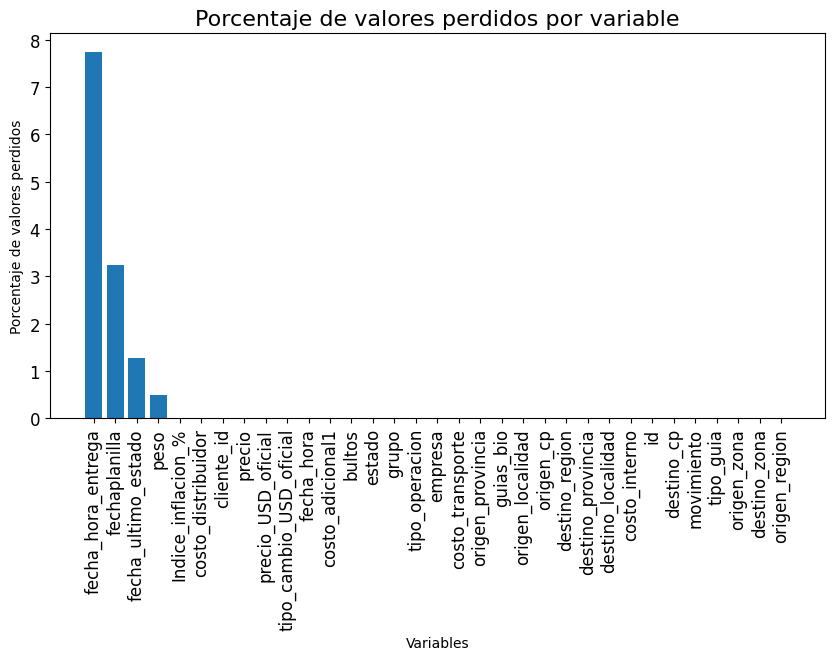

In [9]:
#Graficamos el % de nulos
fig, ax = plt.subplots(figsize=(10,5))
valores_perdidos_sorted = valores_perdidos.sort_values(by=['Porcentaje_Missing'],ascending=False)
ax.bar(valores_perdidos_sorted.index, valores_perdidos_sorted['Porcentaje_Missing'])
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores perdidos')
ax.set_title('Porcentaje de valores perdidos por variable', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

⭕ Tras este analisis podemos concluir que los valores nulos corresponden a las variables "peso" con el 0.5%, "fechadeplanilla" con el 3.2% y "fecha_hora_entrega" con el 7.7% y finalmente "fecha_ultimo_estado"con el 1.2%. 

Decisión: Teniendo en cuenta que nuestro analisis se enfocara principalmente en los ingresos en volumen y precio de venta por ordenes de operaciones segun clientes desestimaremos las variables "fecha_hora_entrega", "fechaplanilla" y "fecha_ultimo_estado" y la variable peso la remplazaremos por un malor promedio ya que no afecta el analisis.

##⏩ **4. Generacion de transformaciones**

En esta parte realizaremos algunas transformaciones que nos ayudaran a obtener mas clara la informacion y asi poder analizarla

♦ Remplazamos (,) por (.) en las variables, "precio", "costo_adicional1", "costo_distribuidor","costo_transporte","costo_interno"

♦ Convertimos las variables "fecha_hora" a tipo .date

♦ Creamos variables con nombre del dia/mes de las varialbes que contiene fecha.

♦ Crearemos las variables de costo, rentabilidad y margen de ganancias.


In [10]:
# Remplazo (,) por (.) y cambio el tipo de datos object a float
postal['precio'] = pd.to_numeric(postal['precio'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['costo_distribuidor'] = pd.to_numeric(postal['costo_distribuidor'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['costo_transporte'] = pd.to_numeric(postal['costo_transporte'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['costo_interno'] = pd.to_numeric(postal['costo_interno'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['costo_adicional1'] = pd.to_numeric(postal['costo_adicional1'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['tipo_cambio_USD_oficial'] = pd.to_numeric(postal['tipo_cambio_USD_oficial'].astype(str).str.replace(',', '.'), errors='coerce').round(2)
postal['precio_USD_oficial'] = pd.to_numeric(postal['precio_USD_oficial'].astype(str).str.replace(',', '.'), errors='coerce').round(2)

In [11]:
# Primero, aseguro de que las fechas estén en formato datetime en ambos marcos de datos
postal["fecha_hora"] = pd.to_datetime(postal["fecha_hora"], format='%d/%m/%Y %H:%M')

In [12]:
print(postal["fecha_hora"].dtypes)

datetime64[ns]


In [13]:
#creo columnas con el nombre y numero del dia, semana y mes de la variable "fecha_hora"
postal['Month_1'] = pd.to_datetime(postal['fecha_hora']).dt.month_name()
postal['mes_1'] = pd.to_datetime(postal['fecha_hora']).dt.month
postal['day_1'] = pd.to_datetime(postal['fecha_hora']).dt.day_name()
postal['dia_1'] = pd.to_datetime(postal['fecha_hora']).dt.day
postal['semana_1'] = pd.to_datetime(postal['fecha_hora']).dt.week

In [14]:
# Crea una nueva columna que sume los costos
postal['total_costo'] = postal['costo_distribuidor'] + postal['costo_interno']+ postal['costo_transporte']+ postal['costo_adicional1']

In [15]:
# Calcula el porcentaje de cada valor de 'precio' con respecto al total de la columna.
postal['porcentaje_precio'] = 100 * postal['precio'] / postal['precio'].sum()

# Calcula el porcentaje de cada valor de 'costo total' con respecto al precio de venta, y se redondea a dos decimales.
postal['porcentaje_costo'] = round((postal['total_costo'] / postal['precio']) * 100, 2)

# Calcula la ganancia y la rentabilidad en porcentaje sobre el precio de venta, y se redondea a dos decimales.
postal['margen_ganancia'] = postal['precio'] - postal['total_costo']
postal['rentabilidad'] = round((postal['margen_ganancia'] / postal['total_costo']) * 100, 2)

# Crea columnas adicionales relacionadas con el tipo de cambio y calcula la rentabilidad en dólares sobre la base de los precios oficiales de venta.
postal['costo_en_dolar_oficial'] = postal['total_costo'] / postal['tipo_cambio_USD_oficial']
postal['margen_ganancia_USD_oficial'] = postal['precio_USD_oficial'] - postal['costo_en_dolar_oficial']
postal['rentabilidad_USD_oficial'] = postal['margen_ganancia_USD_oficial'] / postal['costo_en_dolar_oficial'] * 100
postal['rentabilidad_porcentaje_USD_oficial'] = round(postal['rentabilidad_USD_oficial'], 2)


In [16]:
#promediamos la variable "peso" para poder cargar dicho valor a los nulos de la variable
print(round(postal["peso"].mean(),2))

12.46


In [17]:
#reemplazar con el resultado del promedio
col_cat=['peso'] 
for i in col_cat:
  postal[i] = postal[i].fillna('12.46')

postal['peso'].value_counts().sum()

128119

##⏩ **5. Visualizando distribuciones** 

###**5.1 Envios por region**

In [21]:
# creamos una columna llamada envio
postal = postal.assign(envio = 1)

In [22]:
#Analizamos  la variaciones de envios y bultos a lo largo del año 
enviobulto = postal.groupby(['destino_region','mes_1','semana_1','dia_1']).agg({'envio':'sum', 'bultos':'sum'}).reset_index()

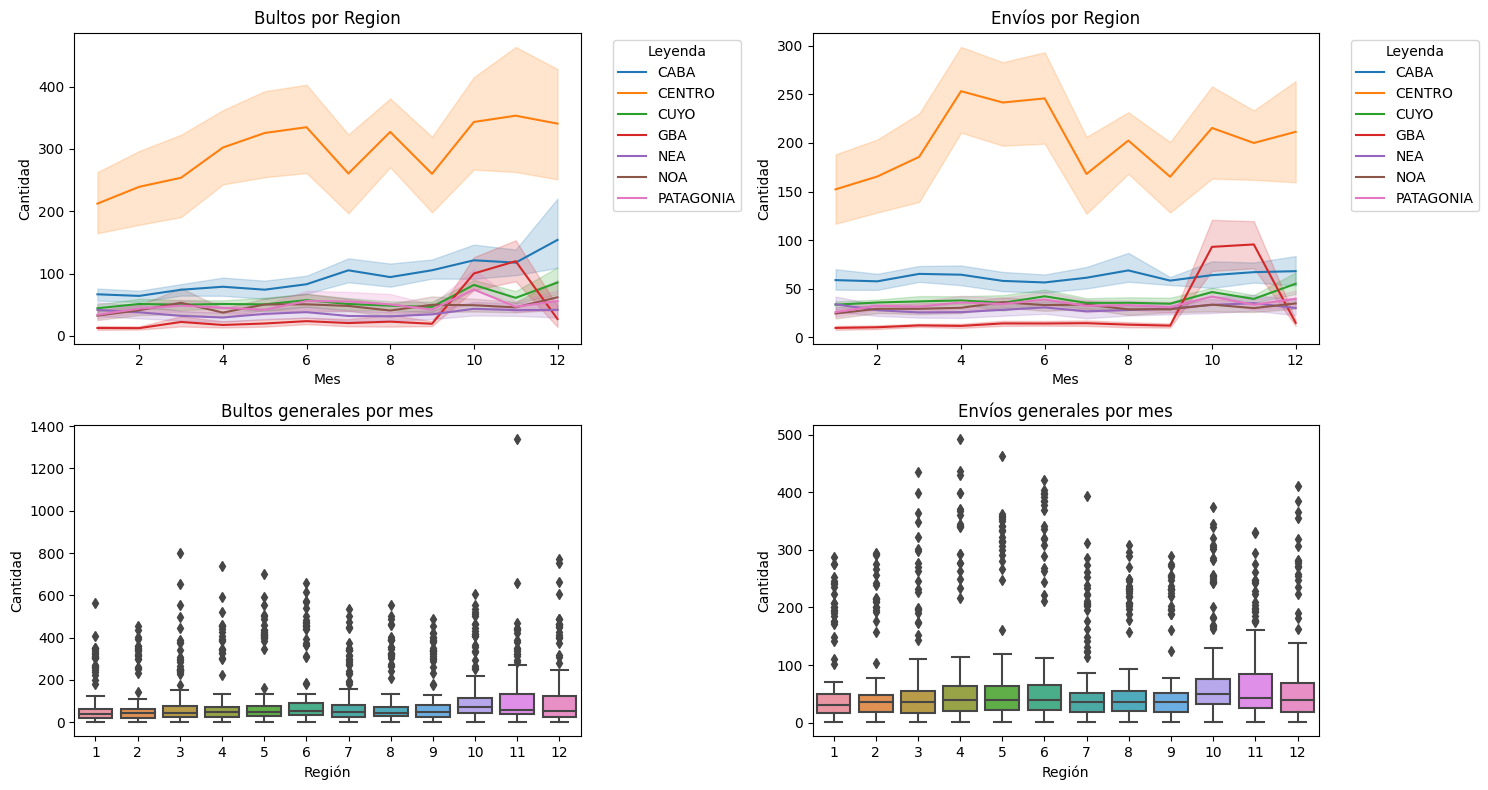

In [25]:
# Crear dos subgráficos separados
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Graficar el primer subgráfico
sns.lineplot(data=enviobulto, x="mes_1", y="bultos", hue="destino_region", ax=axs[0,0])
axs[0,0].set_title("Bultos por Region")
axs[0,0].set_xlabel("Mes")
axs[0,0].set_ylabel("Cantidad")
axs[0,0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

# Graficar el segundo subgráfico
sns.lineplot(data=enviobulto, x="mes_1", y="envio", hue="destino_region", ax=axs[0,1])
axs[0,1].set_title("Envíos por Region")
axs[0,1].set_xlabel("Mes")
axs[0,1].set_ylabel("Cantidad")
axs[0,1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

# Graficar el primer subgráfico
sns.boxplot(data=enviobulto, x="mes_1", y="bultos", ax=axs[1,0])
axs[1,0].set_title("Bultos generales por mes")
axs[1,0].set_xlabel("Región")
axs[1,0].set_ylabel("Cantidad")

# Graficar el segundo subgráfico
sns.boxplot(data=enviobulto, x="mes_1", y="envio", ax=axs[1,1])
axs[1,1].set_title("Envíos generales por mes")
axs[1,1].set_xlabel("Región")
axs[1,1].set_ylabel("Cantidad")


# Mostrar los gráficos
plt.tight_layout()
plt.show()



⭕ Luego de realizar un análisis visual del lineplot, se puede observar que la zona central presenta un mayor movimiento en relación a las demás zonas. Por otro lado, se puede inferir que no hay una tendencia clara de aumento en el número de bultos con respecto a los envíos durante los meses de abril a junio. Sin embargo, al examinar detalladamente el boxplot, se puede constatar que existen días con un mayor volumen de envíos en comparación con otros días.

###**5.2 Tipo de operaciones y movimientos**

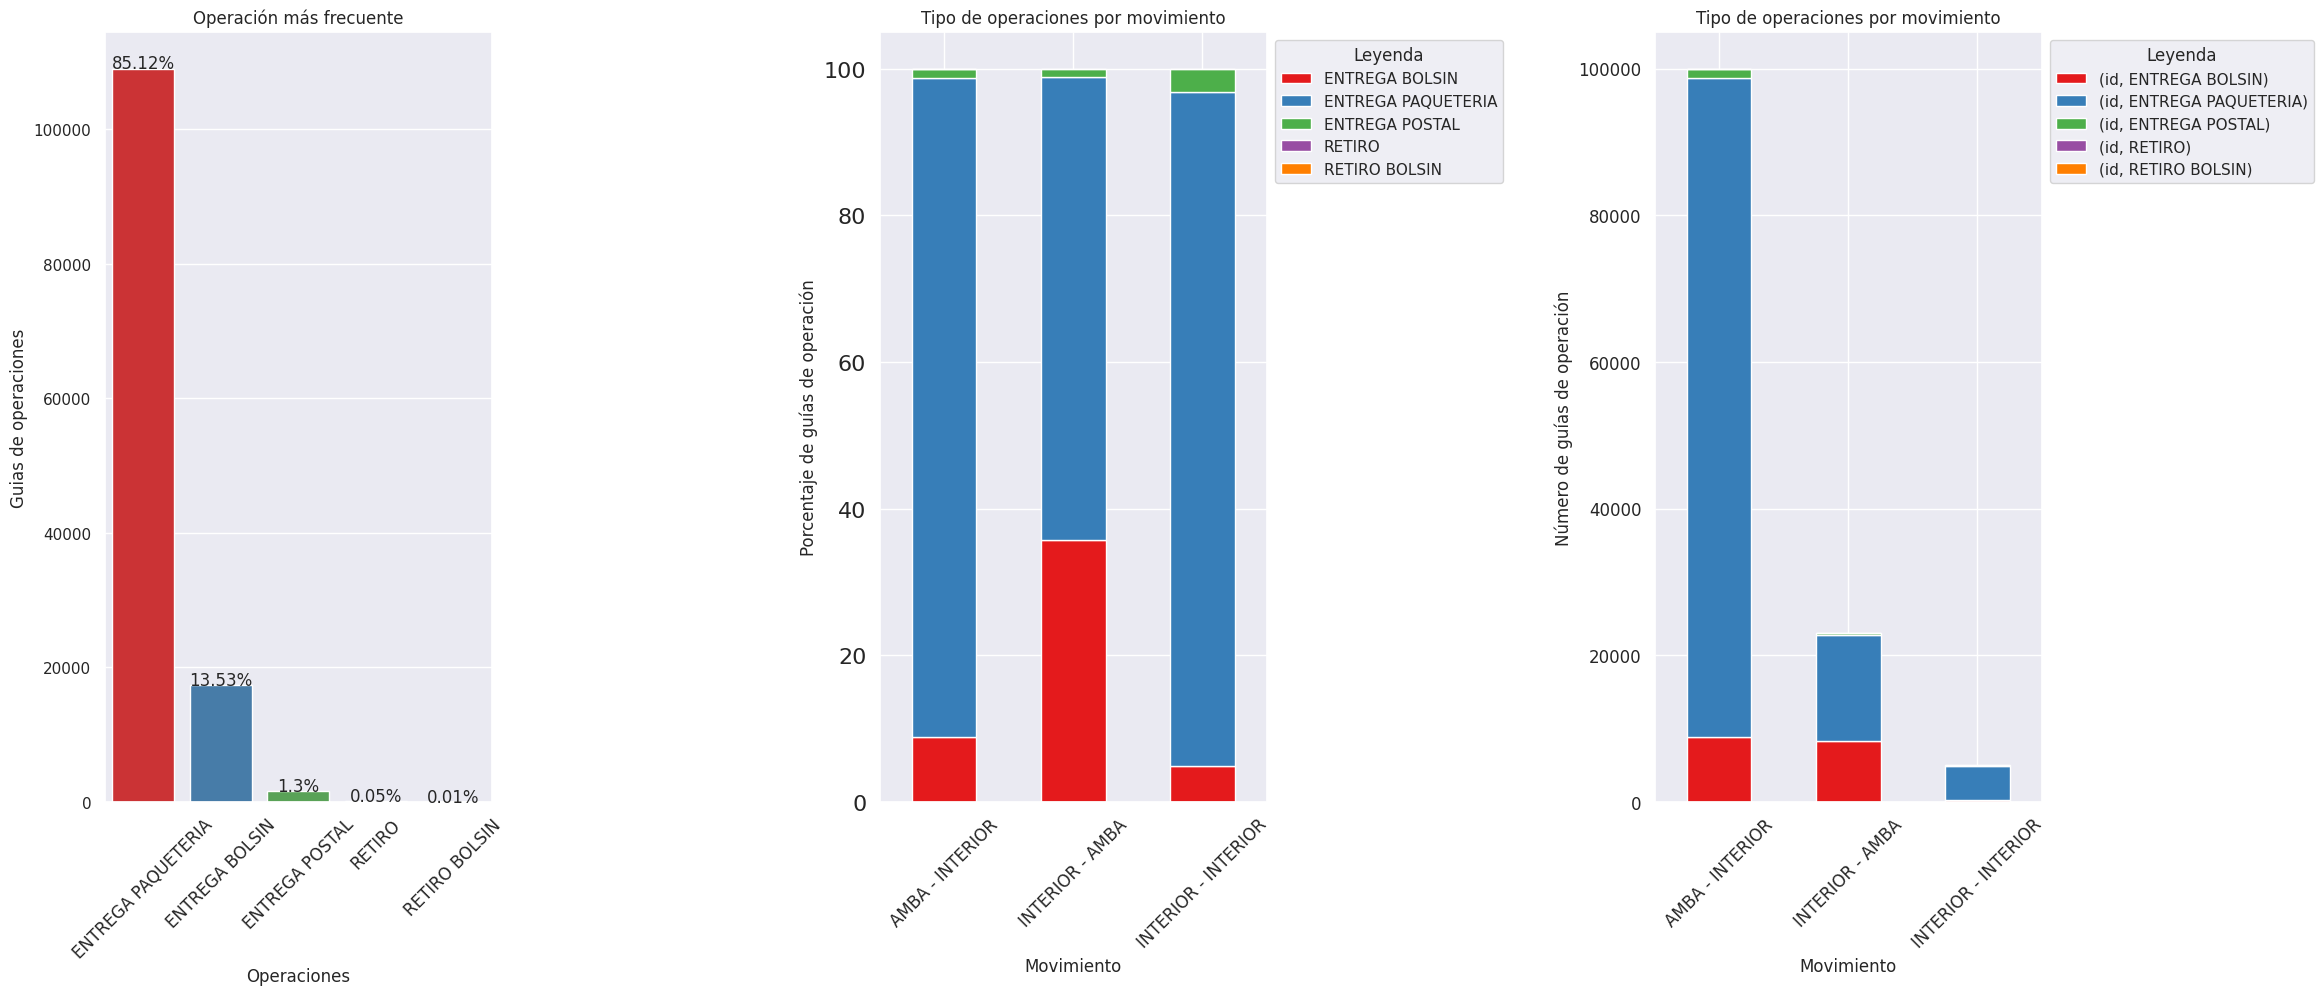

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,10),gridspec_kw={'wspace': 1})

op = postal["tipo_operacion"]
sns.set(font_scale=1)


#Agrego los valores porcentuales de la variable tipo_operacion
for n,i in enumerate(["ENTREGA PAQUETERIA","ENTREGA BOLSIN", "ENTREGA POSTAL", "RETIRO","RETIRO BOLSIN"]):
  porc = postal["tipo_operacion"].value_counts(normalize=True)[i]*100
  axes[0].text(n,postal["tipo_operacion"].value_counts(normalize=False).round(2)[i],porc.round(2).astype(str)+'%', ha="center", fontsize=12)

sns.countplot(x=op, ax=axes[0], palette='Set1')
axes[0].set_title("Operación más frecuente", fontsize=12)
axes[0].set_xlabel("Operaciones", fontsize=12)
axes[0].set_ylabel("Guias de operaciones", fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='center', fontsize=12)

mov_op= postal.groupby(["movimiento","tipo_operacion"]).agg({"id":'count'})
mov  =  mov_op.unstack()

mov_op_pct = mov_op.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
mov_op_pct = mov_op_pct.round(2)

mov_op_pct = mov_op_pct.unstack(level=1)
mov_op_pct.columns = mov_op_pct.columns.droplevel()

ax1 = mov_op_pct.plot(kind='bar', stacked=True, ax=axes[1], fontsize=16, color=sns.color_palette('Set1'))
ax1.set_xlabel('Movimiento', fontsize=12)
ax1.set_ylabel('Porcentaje de guías de operación', fontsize=12)
ax1.set_title('Tipo de operaciones por movimiento', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12)
ax1.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1, 1))

ax2 = mov.plot(kind='bar', stacked=True, ax=axes[2], fontsize=12, color=sns.color_palette('Set1'))
ax2.set_xlabel('Movimiento', fontsize=12)
ax2.set_ylabel('Número de guías de operación', fontsize=12)
ax2.set_title('Tipo de operaciones por movimiento', fontsize=12)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12)
ax2.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

⭕La operación más frecuente en el servicio postal es la entrega de paqueteria. Esta información puede ser útil para planificar mejor la asignación de recursos y mejorar la eficiencia operativa.

Se ha analizado la distribución de los tipos de operaciones por movimiento, lo que puede ayudar a comprender cómo se realizan las diferentes operaciones en el servicio postal y cómo se relacionan con los diferentes movimientos de envío y recepción.

El gráfico de barras apiladas en el segundo eje muestra la distribución de los diferentes tipos de operaciones por movimiento en términos de porcentaje. Este gráfico permite comparar fácilmente la proporción de cada tipo de operación en cada movimiento, lo que puede ayudar a identificar patrones y tendencias.

El tercer eje muestra el número total de guías de operación para cada tipo de operación y movimiento. Este gráfico puede ayudar a comprender el volumen de operaciones en diferentes momentos y cómo se distribuyen entre los diferentes tipos de operaciones.

En conclucion podemos comprender que el fuerte son el envio de paqueteria desde el AMBA al Interior del pais, no asi es el caso inverso.

###**5.3 Operaciones por provincias**

Continuaremos analizando las variables "origen.provincia" y "destino.provincia" para asi focalizar donde se estan concentrando el mayor % de las operaciones tanta de ida con de vuelta, de esta forma evaluaremos que % de dificultades se presentan.

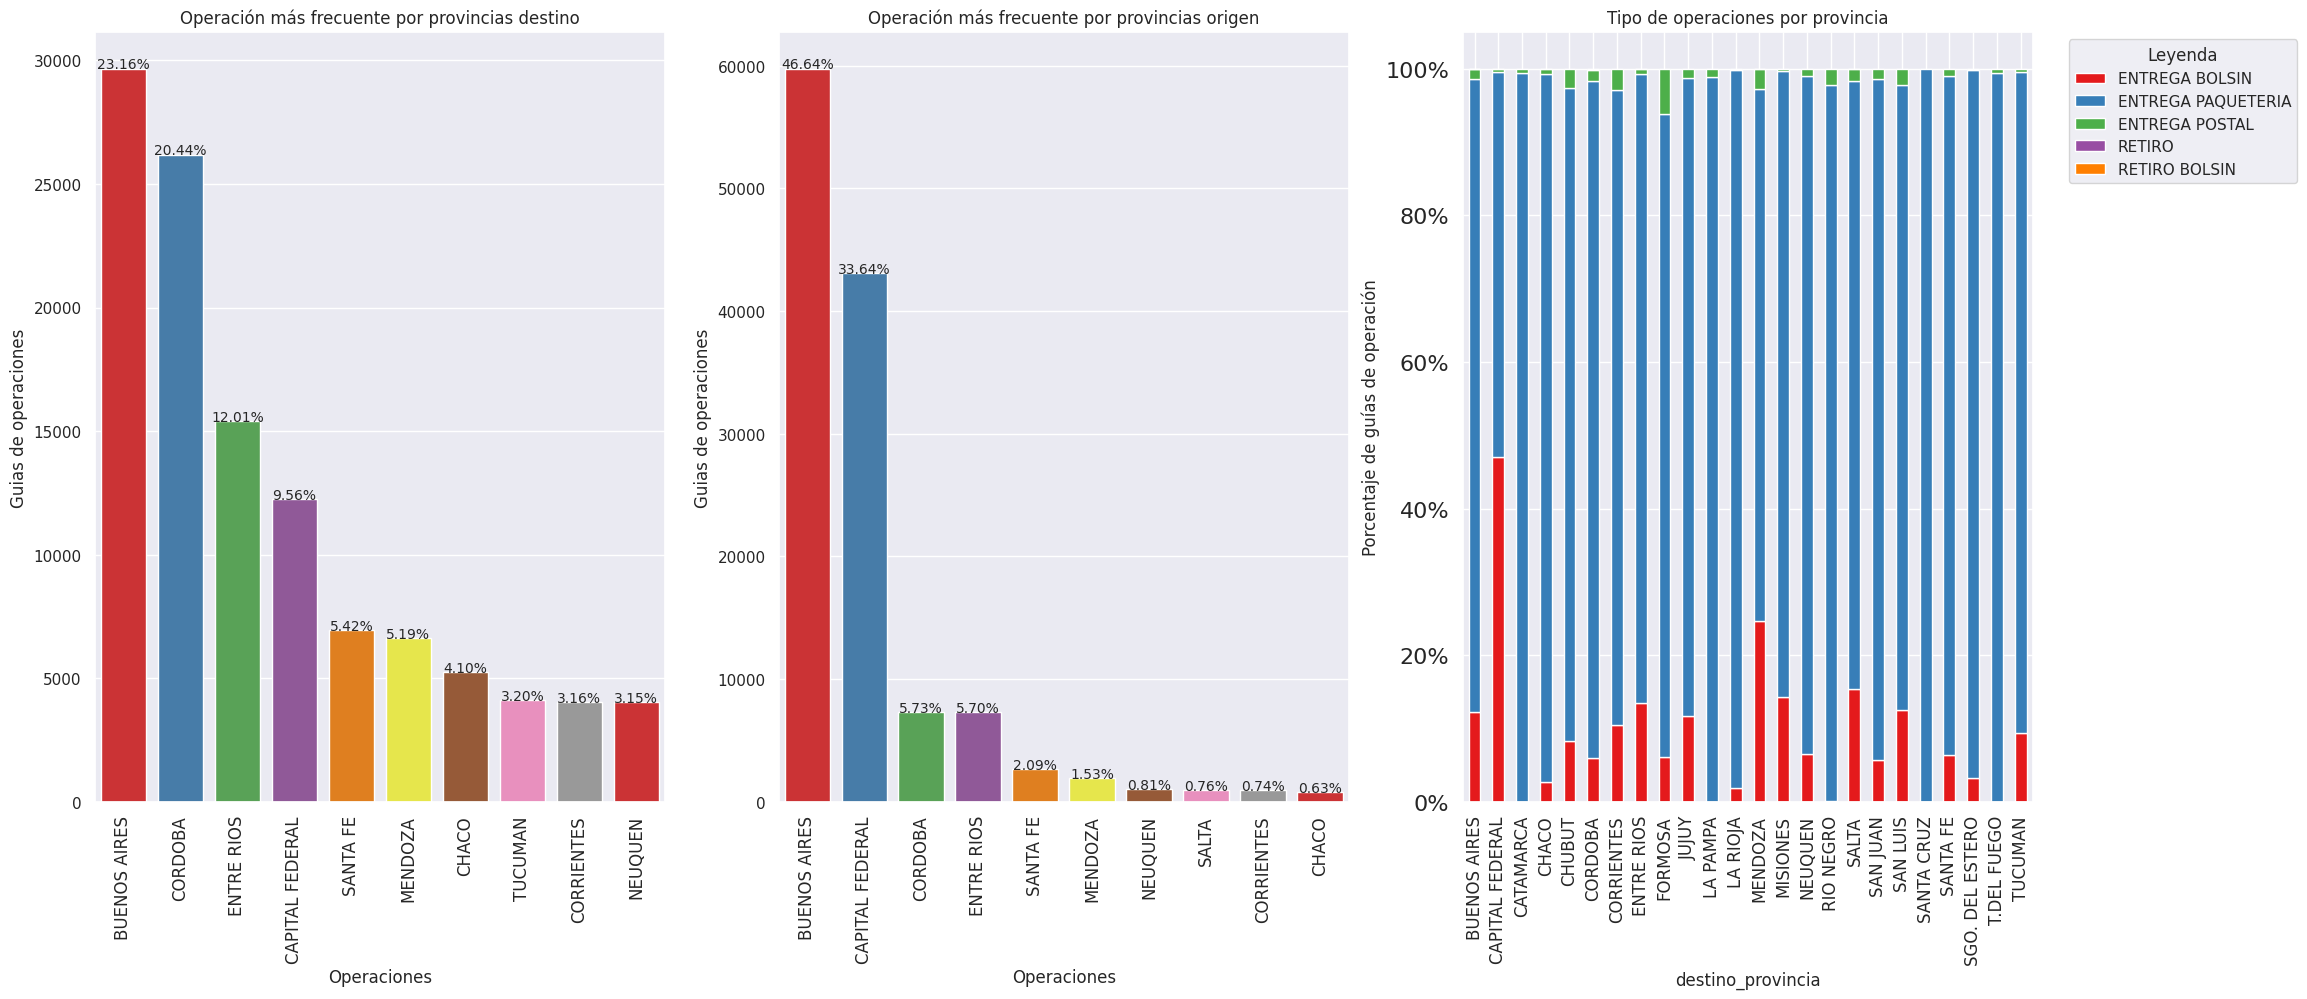

In [36]:
import matplotlib.ticker as mtick

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,10), gridspec_kw={'hspace': .5})

prov_op_d = postal["destino_provincia"]
prov_op_o = postal["origen_provincia"]
sns.set(font_scale=1)

sns.countplot(x=prov_op_d, ax=axes[0], palette='Set1', order=prov_op_d.value_counts().head(10).index)
axes[0].set_title("Operación más frecuente por provincias destino", fontsize=12)
axes[0].set_xlabel("Operaciones", fontsize=12)
axes[0].set_ylabel("Guias de operaciones", fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='center', fontsize=12)

sns.countplot(x=prov_op_o, ax=axes[1], palette='Set1',order=prov_op_o.value_counts().head(10).index)
axes[1].set_title("Operación más frecuente por provincias origen", fontsize=12)
axes[1].set_xlabel("Operaciones", fontsize=12)
axes[1].set_ylabel("Guias de operaciones", fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='center', fontsize=12)

# Función para agregar etiquetas con porcentajes
def AutoLabelCountPlot(ax, df):
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{0:.2f}%'.format(100 * height / total),
                ha="center", fontsize=10)

AutoLabelCountPlot(axes[0], prov_op_d)
AutoLabelCountPlot(axes[1], prov_op_o)

prov_d_op= postal.groupby(["destino_provincia","tipo_operacion"]).agg({"id":'count'})
prov_d  =  prov_d_op.unstack()

prov_d_op_pct = prov_d_op.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
prov_d_op_pct = prov_d_op_pct.round(2)
prov_d_op_pct = prov_d_op_pct.unstack(level=1)
prov_d_op_pct.columns = prov_d_op_pct.columns.droplevel()

ax2 = prov_d_op_pct.plot(kind='bar', stacked=True, ax=axes[2], fontsize=16, color=sns.color_palette('Set1'))
ax2.set_ylabel('Porcentaje de guías de operación', fontsize=12)
ax2.set_title('Tipo de operaciones por provincia', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=12)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='center', fontsize=12)

ax2.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

plt.show()


⭕La mayoría de las operaciones de destino (23%) y origen (46%) se realizan en Buenos Aires. Esto es una señal de la importancia de esta provincia para la empresa, y puede ser útil para enfocar los esfuerzos de marketing y publicidad en esa región para mejorar el servicio.

Las gráficas también muestran los diferentes tipos de operaciones que se realizan en cada provincia, lo que puede ser útil para entender los patrones de demanda de los clientes y ajustar las operaciones en consecuencia.

El gráfico de la distribución de los diferentes tipos de operaciones por movimiento también puede ser útil para identificar las áreas en las que la empresa puede estar subutilizando o sobrecargando su capacidad, lo que podría ayudar a mejorar la eficiencia operativa.

En general, estas gráficas pueden son utiles para identificar patrones en la demanda de los clientes, enfocarse en regiones clave y ajustar sus operaciones para mejorar la eficiencia y la satisfacción del cliente.

###**5.4 Precio - Costo - Margen de ganancia**

Al analizar el precio, costo y margen de ganancia en logística se puede lograr una mejor comprensión y control de los costos y rentabilidad en la cadena de suministro. Al conocer estos factores, es posible identificar oportunidades para reducir costos, mejorar la eficiencia operativa y aumentar la rentabilidad.

In [38]:
#creamos un df con las variables para analizar.
grouped_USD = postal.groupby(["mes_1","semana_1","dia_1"]).agg({'precio':'sum', 'precio_USD_oficial':'sum',   'costo_en_dolar_oficial':'sum', 'total_costo':'sum', 'margen_ganancia_USD_oficial':'sum',  'margen_ganancia':'sum','rentabilidad':'mean'}).reset_index()
#grouped_prov = grouped_provmes.merge(postal, on=['mes_1'], how='left')

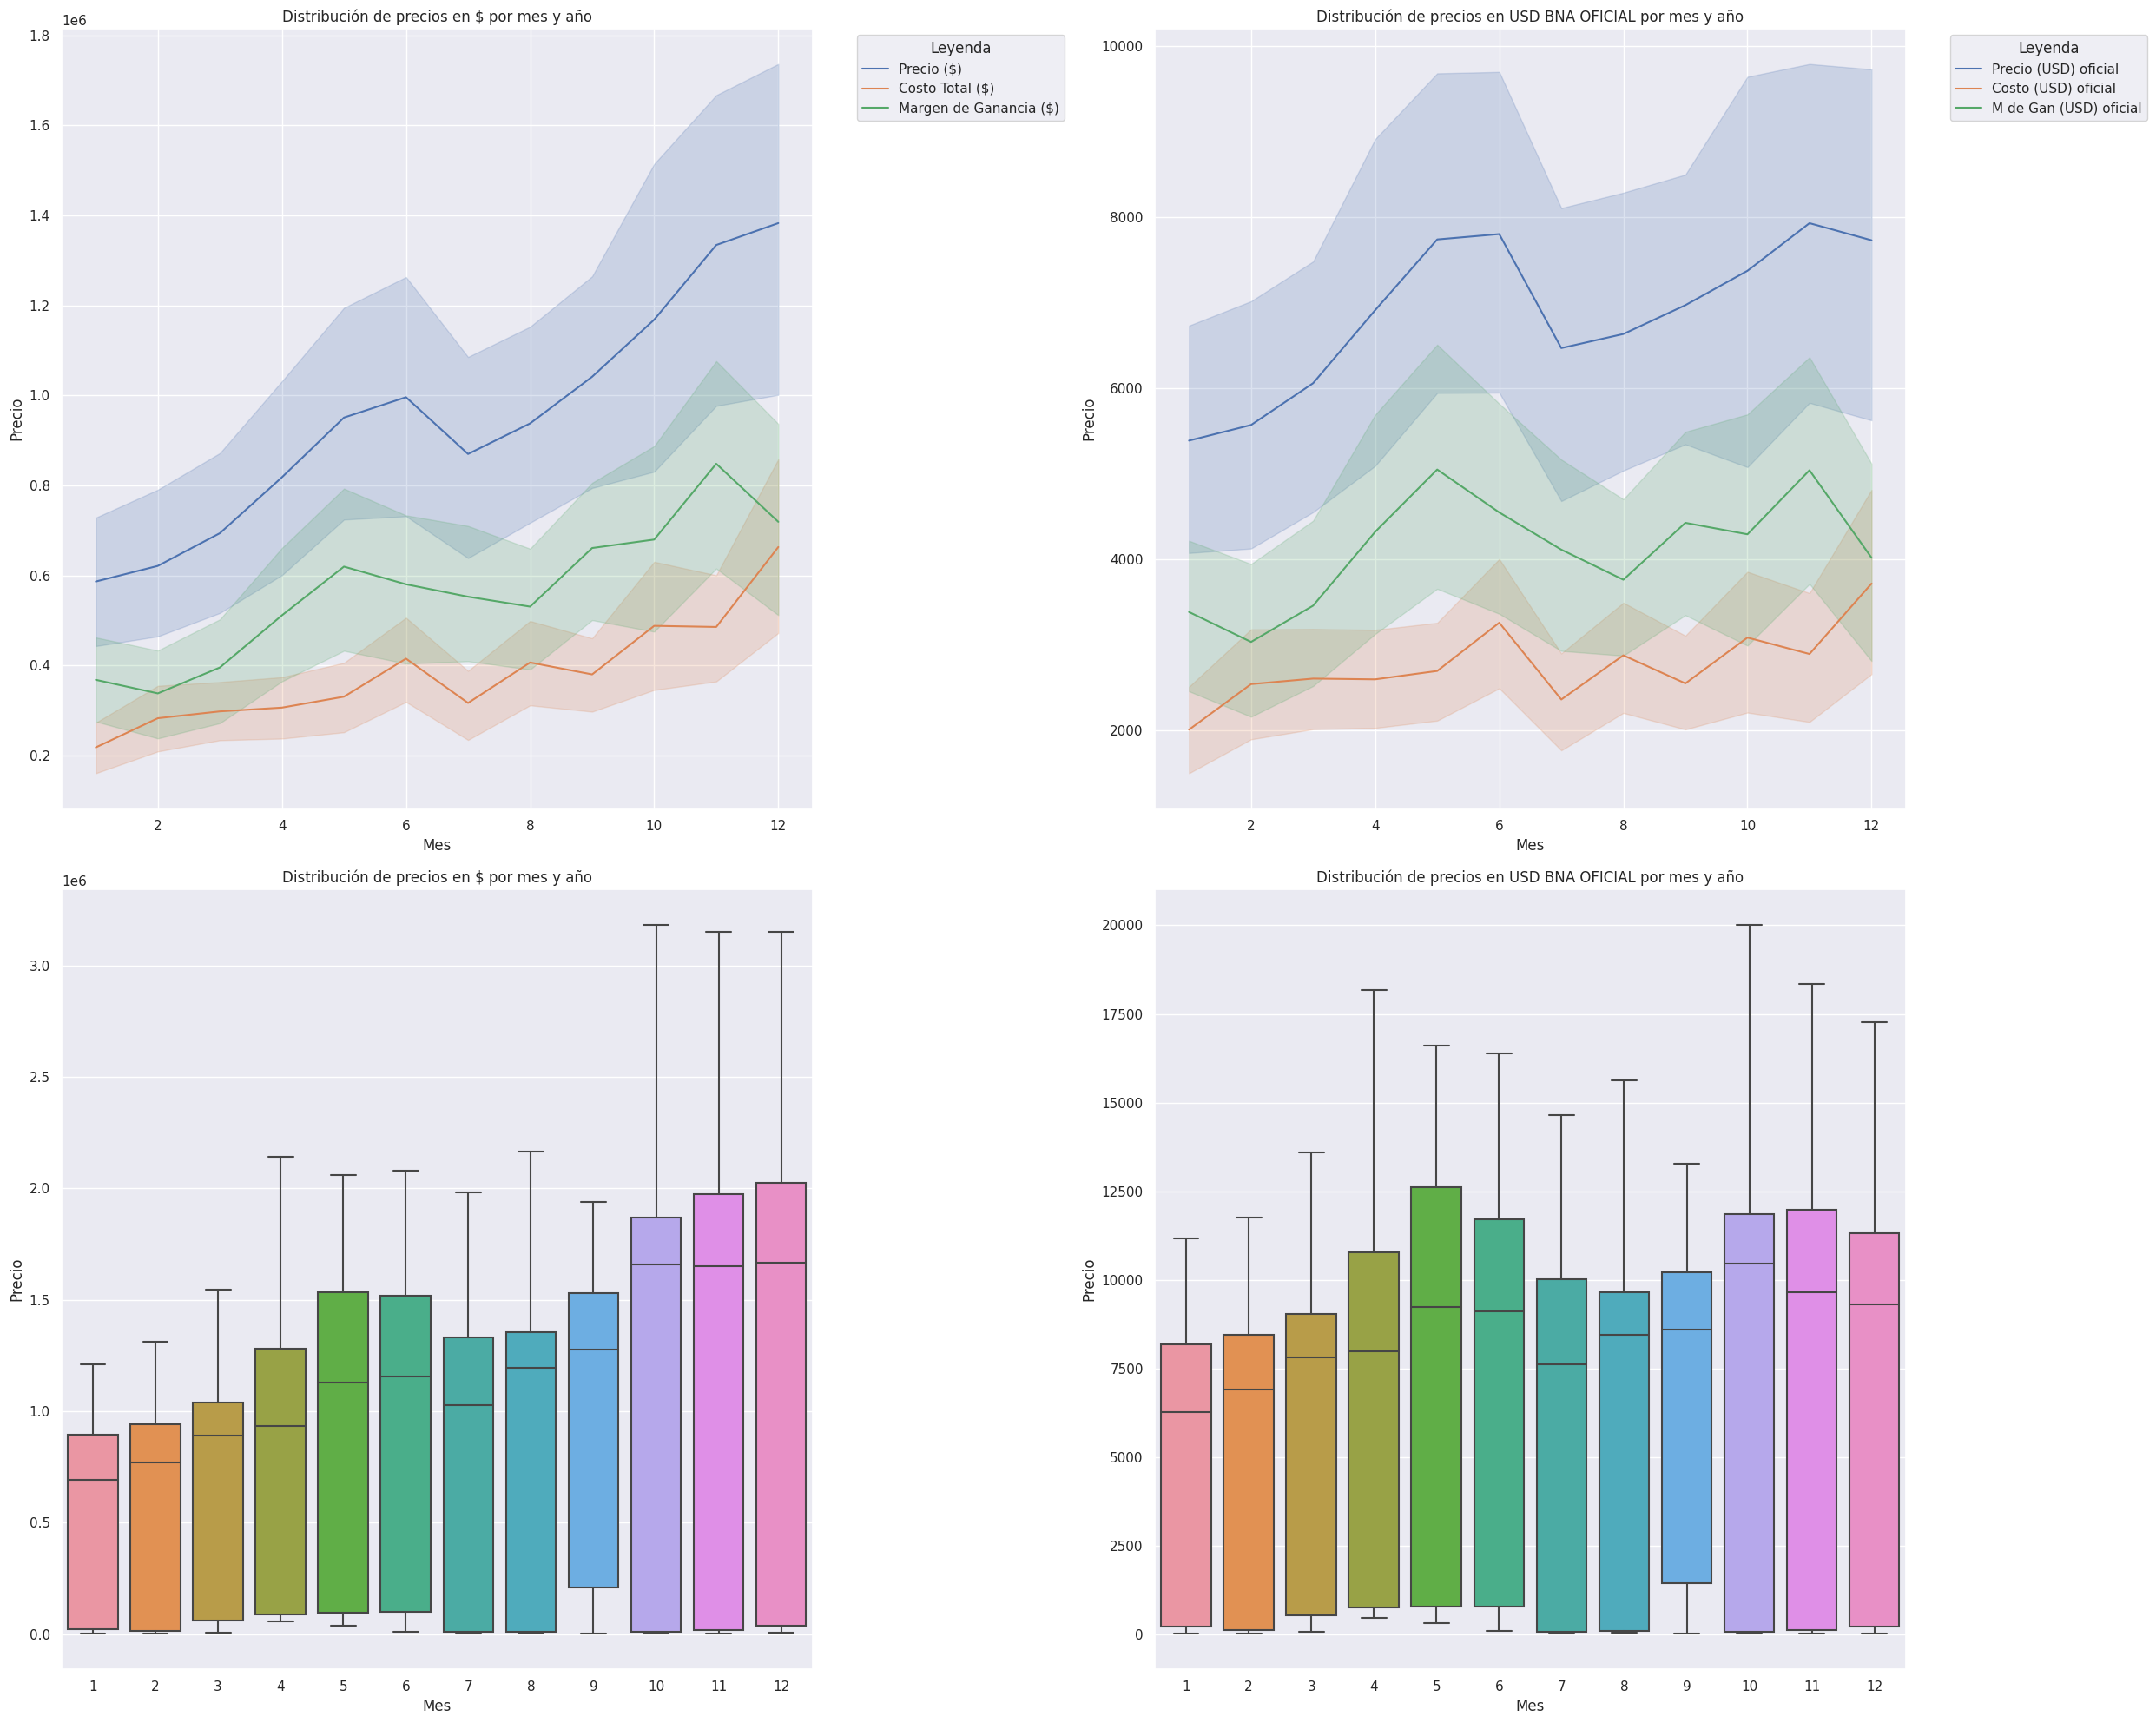

In [48]:
# Crear dos subgráficos separados
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 20))

# Graficar el primer subgráfico
sns.lineplot(data=grouped_USD, x="mes_1", y="precio",label="Precio ($)", ax=axs[0,0])
sns.lineplot(data=grouped_USD, x="mes_1", y="total_costo",label="Costo Total ($)", ax=axs[0,0])
sns.lineplot(data=grouped_USD, x="mes_1", y="margen_ganancia",label="Margen de Ganancia ($)",  ax=axs[0,0])
axs[0,0].set_title("Distribución de precios en $ por mes y año")
axs[0,0].set_xlabel("Mes")
axs[0,0].set_ylabel("Precio")
axs[0,0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

sns.lineplot(data=grouped_USD, x="mes_1", y="precio_USD_oficial",label="Precio (USD) oficial", ax=axs[0,1])
sns.lineplot(data=grouped_USD, x="mes_1", y="costo_en_dolar_oficial",label="Costo (USD) oficial", ax=axs[0,1])
sns.lineplot(data=grouped_USD, x="mes_1", y="margen_ganancia_USD_oficial",label="M de Gan (USD) oficial", ax=axs[0,1])
axs[0,1].set_title("Distribución de precios en USD BNA OFICIAL por mes y año")
axs[0,1].set_xlabel("Mes")
axs[0,1].set_ylabel("Precio")
axs[0,1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

# Graficar el primer subgráfico
sns.boxplot(data=grouped_USD, x="mes_1", y="precio", ax=axs[1,0])
axs[1,0].set_title("Distribución de precios en $ por mes y año")
axs[1,0].set_xlabel("Mes")
axs[1,0].set_ylabel("Precio")

# Graficar el segundo subgráfico
sns.boxplot(data=grouped_USD, x="mes_1", y="precio_USD_oficial", ax=axs[1,1])
axs[1,1].set_title("Distribución de precios en USD BNA OFICIAL por mes y año")
axs[1,1].set_xlabel("Mes")
axs[1,1].set_ylabel("Precio")


# Mostrar los gráficos
plt.tight_layout()
plt.show()

⭕En este conjunto de gráficos podemos visualizar la distribución de precios, costos y márgenes de ganancia en dólares (moneda dura) y en pesos argentinos (moneda volatil), así como también la cantidad de envíos y bultos por mes y año.

En cuanto a la distribución de precios, se puede observar que el precio en pesos argentinos tiene un comportamiento positivo en alza, mayor cantidad de bultos mayor ingreso. Pero no obstante el precio en dólares muestra una tendencia a la baja a lo largo del tiempo si lo comparamos con la cantidad de envios y bultos que ingresaron. Lo mismo pasa con los costos en dólares y en pesos tienen una tendencia creciente a lo largo del tiempo, mientras que los márgenes de ganancia en dólares y en pesos tienen una tendencia a la baja. 

Podemos concluir que hay un estancamiento o desactualizacion en las listas de precios. 

###**5.5 Tipos de clientes**

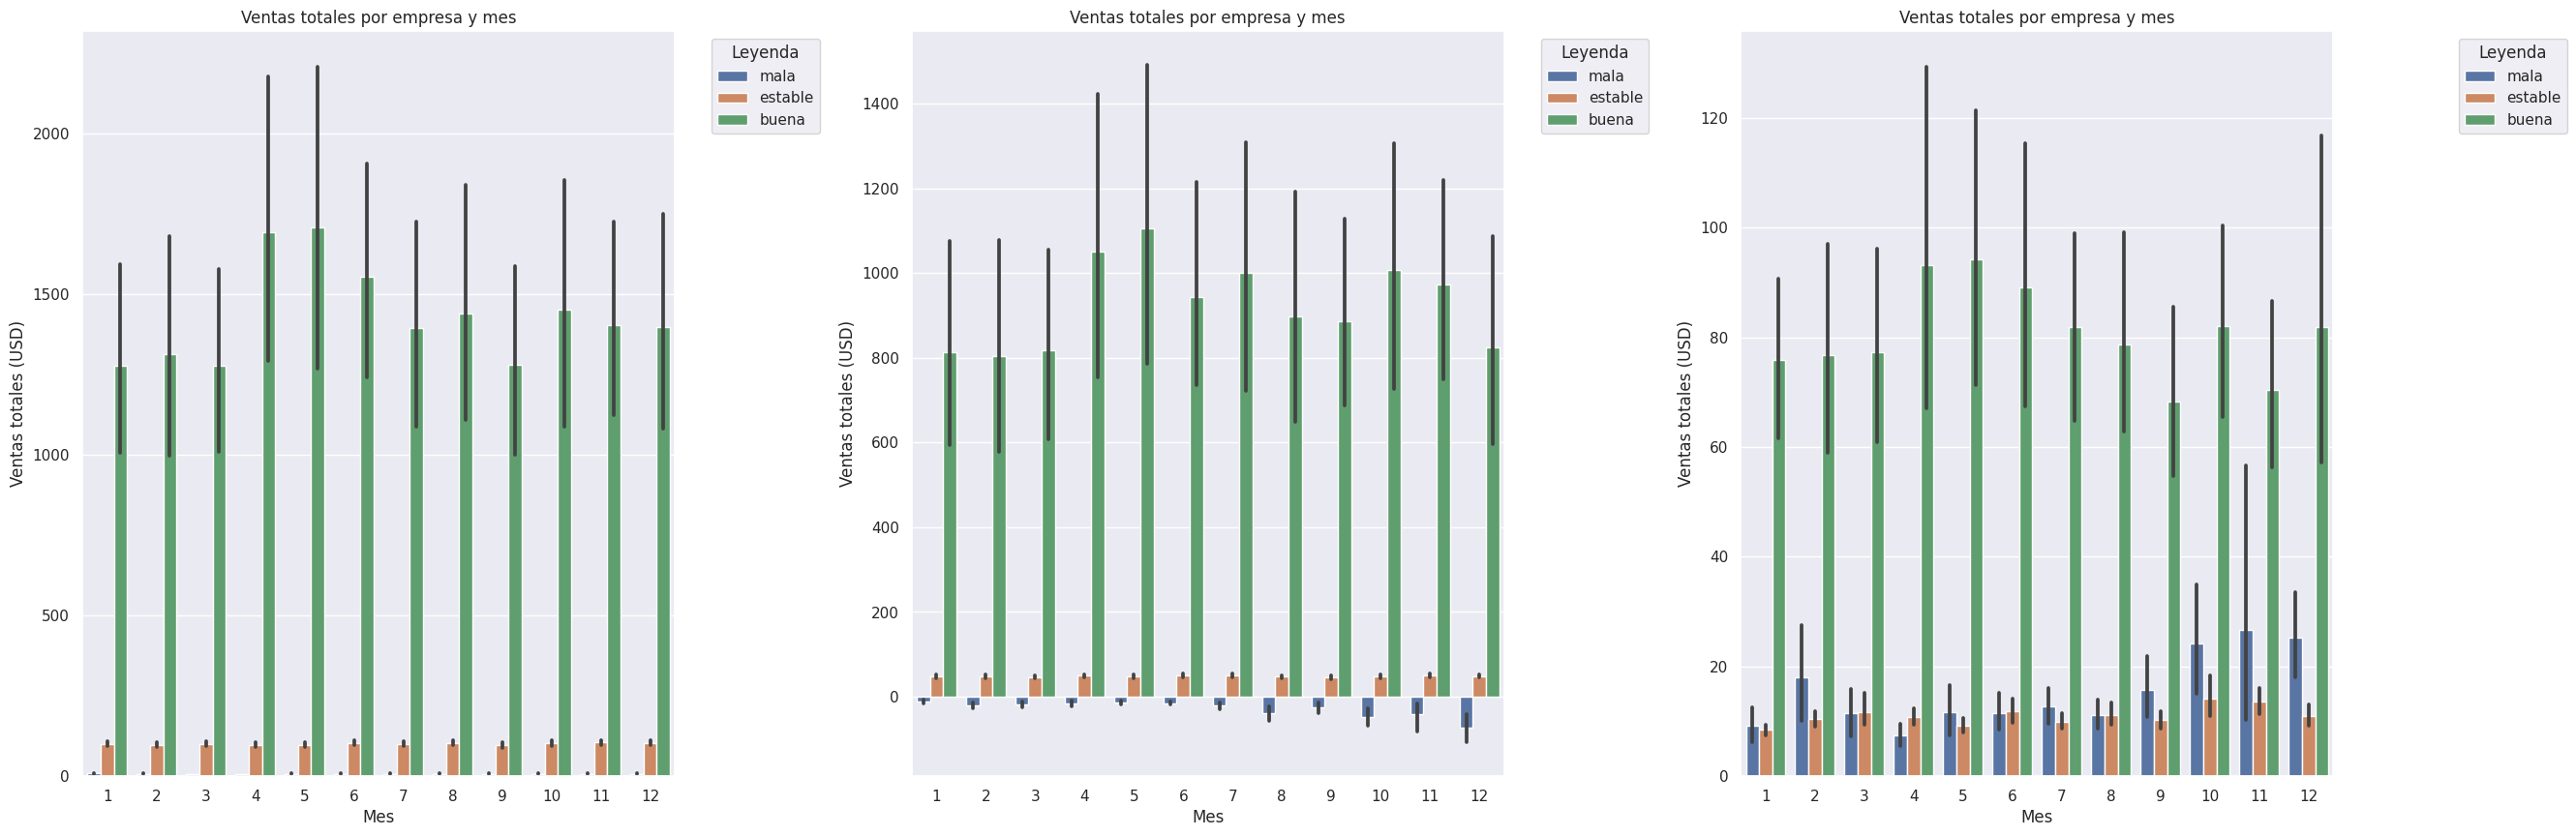

De un total de 262 empresas, 98 son consideradas buenas.
De un total de 262 empresas, 111 dejan un buen margen de ganancia.
De un total de 262 empresas, 89 tienen una alta cantidad bultos.
El porcentaje de la facturación total que corresponde a las, 98 empresas buenas es: 82.10117285452466 %


In [49]:
# calcular ventas totales por empresa y mes
group_empresa= postal.groupby(['empresa', 'mes_1','semana_1'])['precio_USD_oficial','margen_ganancia_USD_oficial','envio','bultos'].sum().reset_index()

# clasificar empresas en grupos según percentiles
group_empresa['percentil1'] = pd.qcut(group_empresa['precio_USD_oficial'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])
group_empresa['percentil2'] = pd.qcut(group_empresa['margen_ganancia_USD_oficial'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])
group_empresa['percentil3'] = pd.qcut(group_empresa['bultos'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10),gridspec_kw={'wspace': .4})
sns.barplot(data=group_empresa, x='mes_1', y='precio_USD_oficial', hue='percentil1',ax=axs[0])
axs[0].set_title('Ventas totales por empresa y mes')
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Ventas totales (USD)')
axs[0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

sns.barplot(data=group_empresa, x='mes_1', y='margen_ganancia_USD_oficial', hue='percentil2',ax=axs[1])
axs[1].set_title('Ventas totales por empresa y mes')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Ventas totales (USD)')
axs[1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))

sns.barplot(data=group_empresa, x='mes_1', y='bultos', hue='percentil2',ax=axs[2])
axs[2].set_title('Ventas totales por empresa y mes')
axs[2].set_xlabel('Mes')
axs[2].set_ylabel('Ventas totales (USD)')
axs[2].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.2, 1))

plt.show()
total_empresas = group_empresa['empresa'].nunique()
buenas_empresas_g = group_empresa[group_empresa['percentil1'] == 'buena']['empresa'].nunique()
buenas_empresas_mg = group_empresa[group_empresa['percentil2'] == 'buena']['empresa'].nunique()
buenas_empresas_b = group_empresa[group_empresa['percentil3'] == 'buena']['empresa'].nunique()

# Calcular el porcentaje de facturación que corresponde a empresas buenas
empresas_buenas = group_empresa[group_empresa["percentil1"] == "buena"]
facturacion_empresas_buenas = empresas_buenas["precio_USD_oficial"].sum()
facturacion_total = group_empresa["precio_USD_oficial"].sum()
porcentaje_empresas_buenas = (facturacion_empresas_buenas / facturacion_total) * 100

print(f"De un total de {total_empresas} empresas, {buenas_empresas_g} son consideradas buenas.")
print(f"De un total de {total_empresas} empresas, {buenas_empresas_mg} dejan un buen margen de ganancia.")
print(f"De un total de {total_empresas} empresas, {buenas_empresas_b} tienen una alta cantidad bultos.")
print(f"El porcentaje de la facturación total que corresponde a las, {buenas_empresas_g} empresas buenas es:", porcentaje_empresas_buenas, "%")


In [44]:
# Clasificamos las empresas si son malas, estables o buenas
region_empresa=postal[['id', 'cliente_id', 'empresa', 'bultos', 
       'precio_USD_oficial', 'precio', 'destino_zona', 'movimiento', 
       'destino_localidad', 'destino_provincia', 'destino_region', 
       'mes_1','dia_1', 'semana_1', 'total_costo','costo_en_dolar_oficial',
       'margen_ganancia_USD_oficial']]
       
region_empresa['percentil1'] = pd.qcut(region_empresa['precio_USD_oficial'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])
region_empresa['percentil2'] = pd.qcut(region_empresa['margen_ganancia_USD_oficial'], q=[0, 0.2, 0.8, 1.0], labels=['mala', 'estable', 'buena'])

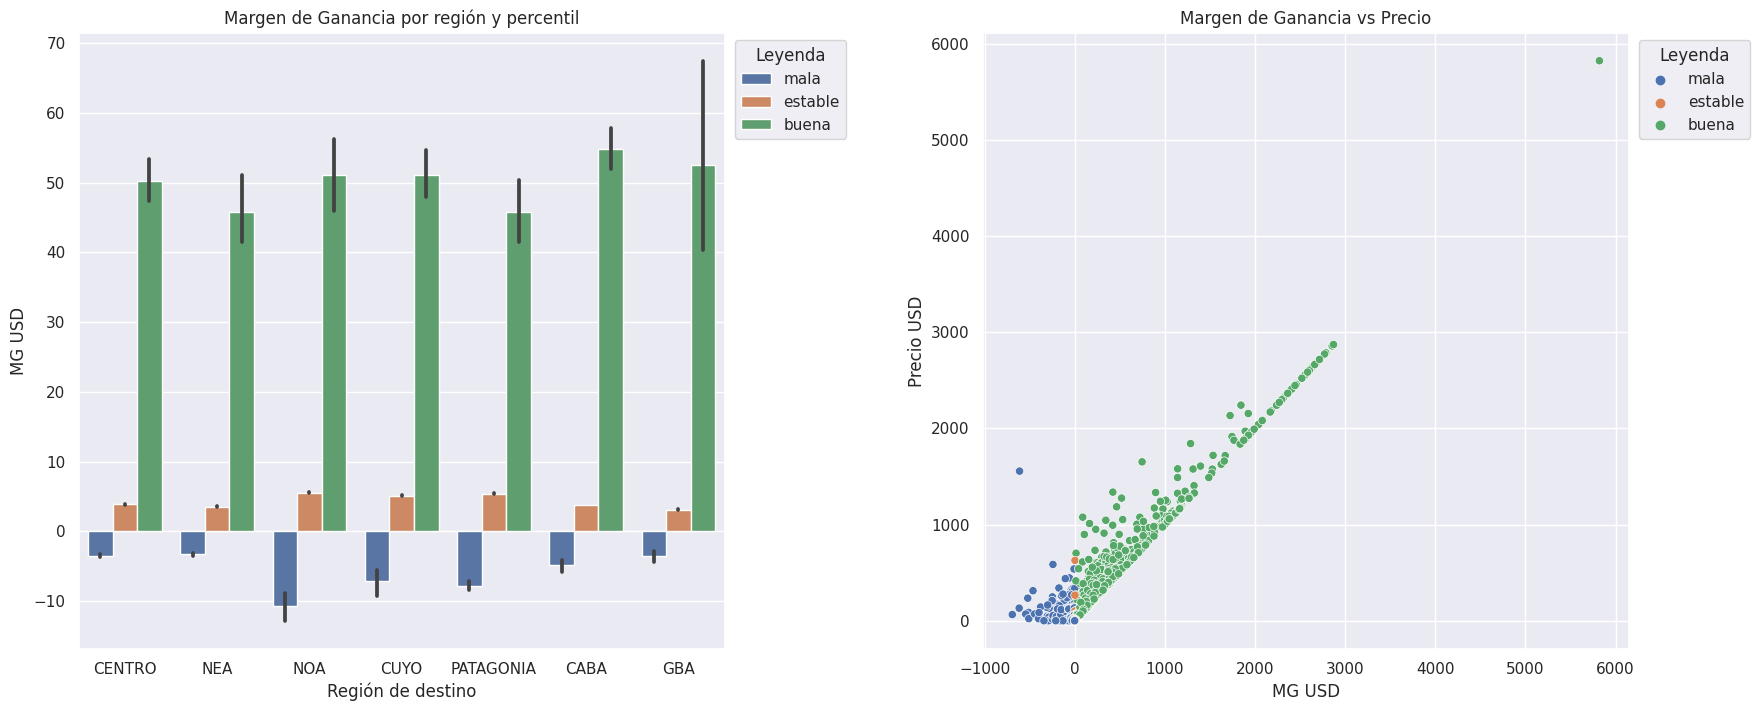

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),gridspec_kw={'wspace': .4})

sns.barplot(x='destino_region', y='margen_ganancia_USD_oficial', hue='percentil2', data=region_empresa, ax=axs[0]) 
axs[0].set_xlabel('Región de destino')
axs[0].set_ylabel('MG USD')
axs[0].set_title('Margen de Ganancia por región y percentil')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.2, 1))

sns.scatterplot(x='margen_ganancia_USD_oficial', y='precio_USD_oficial', hue='percentil2', data=region_empresa, ax=axs[1])
axs[1].set_xlabel('MG USD')
axs[1].set_ylabel('Precio USD')
axs[1].set_title('Margen de Ganancia vs Precio')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()


⭕ Basándonos en los datos proporcionados, podemos concluir que de un total de 262 empresas, alrededor del 37% se consideran buenas y el 42% dejan un buen margen de ganancia. Además, el 34% de las empresas tienen una alta cantidad de bultos y todas afectan positivamente en cada region. 

Lo importante es que el porcentaje de la facturación total que corresponde a las 98 empresas buenas es del 82.1%, lo que sugiere que estas empresas son responsables de la mayoría de los ingresos.

En resumen, esto significa que hay un grupo significativo de empresas que tienen un papel importante en la generación de ingresos. Sin embargo, se necesitaría más análisis para entender mejor las razones detrás del éxito de estas empresas y para identificar oportunidades de mejora para las que no se consideran buenas.

##⏩ **6. Concluciones y cierre** 

⭕ Por lo que se puede inferir del análisis de los datos presentados, se puede observar que la entrega de paquetería es la operación más frecuente en el servicio postal, especialmente en el envío desde el AMBA hacia el interior del país. Además, se destaca la importancia de la provincia de Buenos Aires como punto de origen y destino de la mayoría de las operaciones.

En cuanto a la facturación, se puede concluir que hay un estancamiento o desactualización en las listas de precios, ya que se observa una tendencia a la baja en el margen de ganancia en dólares y en pesos. Por lo tanto, es necesario analizar y ajustar las estrategias de precios y costos para mejorar la rentabilidad.

También se puede identificar un grupo significativo de empresas que tienen un papel importante en la generación de ingresos, lo que sugiere la necesidad de analizar las razones detrás del éxito de estas empresas y de identificar oportunidades de mejora para aquellas que no se consideran buenas.

En resumen, la visualización de los datos y el análisis realizado pueden ser útiles para la planificación y toma de decisiones en relación a la asignación de recursos, la eficiencia operativa, la identificación de patrones y tendencias de demanda, y la mejora de la rentabilidad de la empresa.